### Import necessary modules

In this section of the code, we load the necessary modules, such as pandas, matplotlib, and seaborn.

pandas = Data fragmentation, manupilation and analysis.<br>
matplotlib, seaborn = Visualizations of the data.

In [11]:
import numpy as np
import pandas as pd
from scipy.stats import skew
import matplotlib.pyplot as plt
import seaborn as sns

### Import dataset using pandas module

In [12]:
df=pd.read_csv("./placement-dataset.csv")

### Exploratory Data Analysis

It is an approach to analyzing datasets to summarize their main characteristics, often with visual methods. The goal of EDA is to understand the structure, patterns, relationships, and anomalies within the data before applying any modeling or advanced analysis techniques.

In [13]:
print(df.describe())
print(df.head())
df.info()

             cgpa     package
count  200.000000  200.000000
mean     6.990500    2.996050
std      1.069409    0.691644
min      4.260000    1.370000
25%      6.190000    2.487500
50%      6.965000    2.995000
75%      7.737500    3.492500
max      9.580000    4.620000
   cgpa  package
0  6.89     3.26
1  5.12     1.98
2  7.82     3.25
3  7.42     3.67
4  6.94     3.57
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cgpa     200 non-null    float64
 1   package  200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


Now that we have a brief summary of our dataset, we will shortlist the features (X) and target (Y) for Linear Regression. To do this, we need to identify a value that is dependent on one or more other values. You can also plot visualizations to examine the correlations between the variables.

In [14]:
x=df[['cgpa']]
y=df['package']

To have an effective dataset, we need to consider every value within it. Therefore, we will plot all the correlations of the dataset together.

    Column  Skewness
0     cgpa  0.029655
1  package -0.004815
cgpa: 0 outliers
package: 0 outliers


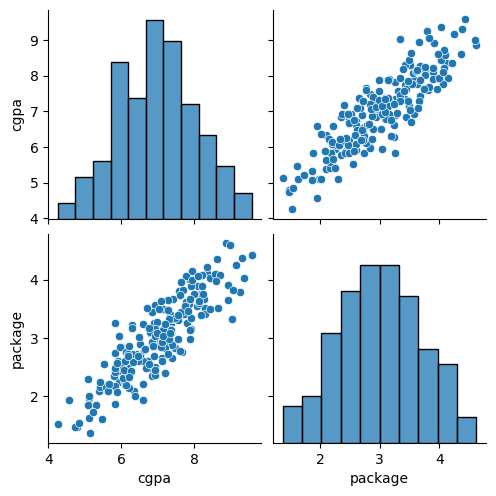

In [18]:
numcol=df.select_dtypes(include='number').columns
numcol = [col for col in numcol if df[col].nunique() > 1]
skewness_values = {col: skew(df[col].dropna(), bias=False) for col in numcol}
skewness_df = pd.DataFrame(skewness_values.items(), columns=["Column", "Skewness"])
print(skewness_df.sort_values(by="Skewness", ascending=False))
outliers = {}
for col in numcol:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find outliers
    outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]

# Print number of outliers per column
for col, values in outliers.items():
    print(f"{col}: {len(values)} outliers")
sns.pairplot(df,kind='scatter')

Now, we need to identify the correlations that resemble a straight line in linear regression.

### Train the Model

Now we have found our correlations ( in simpler words, column ) which we will use to train our model. 

To train the model we will split the data into a 70 percent to 30 percent ratio where we will test on the 30 percent and train on 70 percent.

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

Now we have trained our model, to generate test predictions we will use the testing data.

In [20]:
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print("Predicted values:", y_pred)

Predicted values: [2.79941586 3.15292804 3.21564795 2.41169282 3.54065108 3.78012708
 3.18143709 2.56564168 3.19284071 3.50644023 1.93274083 2.37178016
 3.70030175 2.77660862 3.4893348  3.06169909 2.34897292 3.22134976
 2.20072587 3.32968414 2.47441273 2.91915386 3.33538594 2.89064481
 3.35249137 2.2178313  1.44808703 2.73099415 3.19854252 2.34897292
 3.75731984 2.97617195 3.69459994 2.99327738 2.61125615 3.36389499
 2.49721996 3.09020814 4.18495554 2.97617195 3.11301538 3.13012081
 3.93407593 2.74239777 1.93844264 2.97047014 3.09590995 3.28406966
 1.78449379 3.35819318 2.34897292 2.86783757 3.51784385 2.38888558
 3.07880452 3.83144336 3.52924746 3.40380766 2.97047014 3.07310271]


### Model Evaluation

Now we've successfully finished training and testing our model. It is now ready to provide predictions but we need to evaluate it first.

Evaluations for Linear Regression is conducted by three main parameters:

Mean Absolute Error (MAE): Measures the average absolute difference between predicted and actual values.

Mean Squared Error (MSE): Measures the average of the squared differences between predicted and actual values. It penalizes larger errors more heavily.

Root Mean Squared Error (RMSE): The square root of MSE, bringing the error back to the original unit of the target variable. It's useful for understanding the magnitude of the error.


In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Absolute Error: 0.2606898249919377
Mean Squared Error: 0.09995369482155111
R² Score: 0.7525945592908275


### Export the Model for Deployment

We have now finished building our model and are satisfied with its evaluation. Next, we will deploy the model and provide an interface so users can input their data and receive a predicted value.

The .pkl extension is used for saving models in Python because it stands for Pickle, which is a built-in module in Python for serializing and deserializing objects. Serialization (also known as "pickling") is the process of converting an object (like a trained machine learning model) into a byte stream, which can then be saved to a file. Deserialization (or "unpickling") is the reverse process, where the byte stream is loaded back into memory as the original object.


In [23]:
import pickle
with open('placement_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)
print("Model saved successfully as placement_model.pkl")

Model saved successfully as placement_model.pkl


In [24]:
with open('placement_model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)
print("Model loaded successfully")
sample_cgpa = [[8.5]]  
predicted_package = loaded_model.predict(sample_cgpa)
print(f"Predicted package: {predicted_package[0]}")


Model loaded successfully
Predicted package: 3.8656542181609335


C:\Users\Sudhindra Prakash\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
